# Sub question 5: Health care

Intro

Welke indicator is gebruikt?

Verschil tussen mannen en vrouw in health care. Dit visualiseren met behulp van een bar plot waar bars bovenop elkaar worden geplot. 

Grafiek van de verandering ontwikkelingen over de jaren heen per land. Met een lijn van man en een lijn van vrouw

subconclusion



In [1]:
# import World Bank data
import wbdata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from scipy import stats



In [2]:
#import csv van 15 slechtse landen
# CPIA_worst15 = pd.read_csv("CPIA_worst15.csv")
# CPIA_worst15["date"] = CPIA_worst15["date"].astype(int) 
# CPIA_worst15   

In [3]:
#wbdata.get_source()


In [4]:
#wbdata.get_indicator(source=16)

In [5]:
# Indicators

# SP.DYN.CONU.ZS      	Contraceptive prevalence, any methods (% of women ages 15-49)
# SP.DYN.TO65.MA.ZS   	Survival to age 65, male (% of cohort)
# SP.DYN.TO65.FE.ZS   	Survival to age 65, female (% of cohort)
# SH.STA.ANVC.ZS      	Pregnant women receiving prenatal care (%)


In [6]:
# # Mortality Rates
# wbdata.get_data("SP.DYN.AMRT.MA")    
# wbdata.get_data("SP.DYN.AMRT.FE") 
# # Surival rates 
# wbdata.get_data("SP.DYN.TO65.MA.ZS")  
# wbdata.get_data("SP.DYN.TO65.FE.ZS")  
# #prenetal care
# wbdata.get_data("SH.STA.ANVC.ZS")
# #contraceptive prevalance
# wbdata.get_data("SP.DYN.CONU.ZS")  


In [7]:
def clean(dataset):
    #create data frame
    name = pd.DataFrame(wbdata.get_data(dataset))
    
    #clean the date
    name['country_code'] = name.country.astype(str).str.slice(8,10)
    name['country'] = name.country.astype(str).str.slice(23,-2)
    name['indicator'] = name.indicator.astype(str).str.slice(35,-2)
    name["date"] = name["date"].astype(int) 
    name["value"] = name["value"].astype(float).round(2)
    return name

In [8]:
def fillna(name):
    for i in name.country.unique():
        name.loc[name['country'] == i]  = name.loc[(name['country'] == i)].ffill().bfill()
    return name

In [9]:
def graph(dataframe, title_graph, x_label, y_label):
    fig,ax = plt.subplots(figsize=(30, 15))
    
    # Selects every country only once instead of every time.
    for name in dataframe["country"].unique(): 
        ax.plot(dataframe[dataframe.country==name].date, dataframe[dataframe.country==name].value,label=name)

    #change size and location of legend
    ax.legend(loc=(1.1, 0.2), fontsize = 'xx-large')

    #values of the x and y axis
    plt.xticks(rotation = 65, fontsize = 20)
    plt.yticks(fontsize = 20)

    #labels of the x and y axis 
    plt.title(title_graph, fontsize = 30)
    plt.xlabel(x_label, fontsize = 25)
    plt.ylabel(y_label, fontsize = 25) 

In [28]:
def multi_plot(dataframe):
   
    #plot figure size
    plt.figure(figsize=(20,15))
    
    # title
    plt.suptitle('%s from the year %s to the year %s' %((str(dataframe.indicator.unique()[0])),(str(dataframe.date.min())),(str(
        dataframe.date.max()))),fontsize=18, fontweight=0, color='black', style='italic', y=0.95)

    # 'for-loop' to create graphs 
    num=0
    for i in dataframe.country.unique():
        num+=1

        # size of the plot
        plt.subplot(3,round(dataframe.country.nunique()/3), num)
        
        # plot all the other lines vaguely behind the main plotted line
        for j in dataframe.country.unique():
            plt.plot(dataframe[dataframe.country == j].date, dataframe[dataframe.country==j].value, marker='', color='darkblue', 
                     linewidth=0.3, alpha=0.3)
        
        # Plot the main line
        plt.plot(dataframe[dataframe.country==i].date, dataframe[dataframe.country==i].value, marker='', color='orchid',
                 linewidth=1.9, alpha=0.9, label= i)

    
        
        # This sets the limits. We have chosen to do it this way in order that the only input of the function remains the dataframe
        plt.xlim((dataframe.date.min()),(dataframe.date.max()))
        plt.xticks(dataframe.date.unique(),rotation = 65, fontsize = 8)
        #plt.yticks(dataframe.value.unique())
        plt.ylim((0 if dataframe.value.min()-dataframe.value.min()<=0 else dataframe.value.min()-dataframe.value.min())
                 ,dataframe.value.max()+dataframe.value.min())

        plt.title(i, loc='left', fontsize=12, fontweight=0,)

In [30]:
#multi_plot_Gender(Survival65_worst15)
Survival65_worst15.head()

,country,date,decimal_x,indicator_x,value_x,country_code_x,decimal_y,indicator_y,value_y,country_code_y,Gender
0,Afghanistan,2017,1,CPIA gender equality rating (1=low to 6=high),1.5,AF,0,": 'Survival to age 65, male (% of cohort)",60.47,AF,Male
1,"Yemen, Rep.",2017,1,CPIA gender equality rating (1=low to 6=high),1.5,YE,0,": 'Survival to age 65, male (% of cohort)",61.56,YE,Male
2,Somalia,2017,1,CPIA gender equality rating (1=low to 6=high),2.0,SO,0,": 'Survival to age 65, male (% of cohort)",49.31,SO,Male
3,Guinea-Bissau,2017,1,CPIA gender equality rating (1=low to 6=high),2.0,GW,0,": 'Survival to age 65, male (% of cohort)",52.02,GW,Male
4,South Sudan,2017,1,CPIA gender equality rating (1=low to 6=high),2.0,SS,0,": 'Survival to age 65, male (% of cohort)",50.37,SS,Male


In [76]:
def twoLineMulti_plot(dataframe1, dataframe2):
   
    #plot figure size
    plt.figure(figsize=(20,15))
    
    # title
#     plt.suptitle('%s from the year %s to the year %s' %((str(dataframe.indicator.unique()[0])),(str(dataframe.date.min())),(str(
#         dataframe.date.max()))),fontsize=18, fontweight=0, color='black', style='italic', y=0.95)
    plt.suptitle('test')

    # 'for-loop' to create graphs 
    num=0
    for i in dataframe1.country.unique():
        num+=1

        #size of the plot
        plt.subplot(3,round(dataframe1.country.nunique()/3), num)
        
        # plot all the other lines vaguely behind the main plotted line
#         for j in dataframe.country.unique():
#             plt.plot(dataframe[dataframe.country == j].date, dataframe[dataframe.country==j].value, marker='', color='darkblue', 
#                      linewidth=0.3, alpha=0.3)
        
        # Plot the main line
        plt.plot(dataframe1[dataframe1.country==i].date, dataframe1[dataframe1.country==i].value, marker='', color='blue',
                 linewidth=1.9, alpha=0.9, label= i)
    
    cnt=0
    for i in dataframe2.country.unique():
        cnt+=1   
        #size of the plot
        plt.subplot(3,round(dataframe2.country.nunique()/3), cnt)
        
        plt.plot(dataframe2[dataframe2.country==i].date, dataframe2[dataframe2.country==i].value, marker='', color='pink',
                 linewidth=1.9, alpha=0.9, label= i)

def TwoLinePlot(merged, title = '', xlabel = '', ylabel = ''):
    merged.pivot(index = "country", columns = "Gender", values = "value").plot(color = ['pink', 'blue'], 
                                                                                 figsize = (30,10), fontsize = 20)

    plt.xticks(rotation = 65, fontsize = 20)
    plt.yticks(fontsize = 20)

    # labels
    plt.title(title, fontsize = 30)
    plt.xlabel(xlabel, fontsize = 25)
    plt.ylabel(ylabel, fontsize = 25)

    plt.legend(fontsize = 'xx-large')   
    
    

        
        # This sets the limits. We have chosen to do it this way in order that the only input of the function remains the dataframe
#         plt.xlim((dataframe.date.min()),(dataframe.date.max()))
#         plt.xticks(dataframe.date.unique(),rotation = 65, fontsize = 8)
#         #plt.yticks(dataframe.value.unique())
#         plt.ylim((0 if dataframe.value.min()-dataframe.value.min()<=0 else dataframe.value.min()-dataframe.value.min())
#                  ,dataframe.value.max()+dataframe.value.min())

        #plt.title(i, loc='left', fontsize=12, fontweight=0,)

In [77]:
TwoLinePlot(S65_years)

ValueError: Index contains duplicate entries, cannot reshape

In [11]:
def getYears15(name):
    name.date = name.date.astype(int)
    years = name.loc[(name['date'] >= 2007) & (name['date'] <= 2017)]

    years_worst = years.loc[(years.country.isin(GEI_worst15.country)),:]
    years_worst_sorted = years_worst.sort_values(by='date',ascending=True)
    
    return years_worst_sorted

In [12]:
GEI_all = clean("IQ.CPA.GNDR.XQ")
# Filter the dataset on year and on country code which are not numeric
GEI_all_year_alpha = GEI_all.loc[(GEI_all['date'] == 2017) & (GEI_all.country_code.str.isalpha())]
GEI_OnlyCountries = GEI_all_year_alpha[17:]

#sort the countries by 'value' (their rating) and only show the Top 15
GEI_worst15 = GEI_OnlyCountries.sort_values(by='value', ascending=True)[:15]

In [13]:
# Creating the data frames
#ContraPrevalance = clean("SP.DYN.CONU.ZS")
Survival65_Male = clean("SP.DYN.TO65.MA.ZS")
Survival65_Female = clean("SP.DYN.TO65.FE.ZS")

Survival65_Male = fillna(Survival65_Male)
Survival65_Female = fillna(Survival65_Female)

#PrenatalCare = clean ('SH.STA.ANVC.ZS')

In [14]:
Survival65_Male['Gender'] = "Male"
Survival65_Female['Gender'] = 'Female'

# Barplot
15 landen 2017

Per land gemid voor man/vrouw apart

In [15]:
# jaar 2017
def dataframe_worst15(dataframe):
    now = dataframe.sort_values("date", ascending = False).drop_duplicates(["country"])
    worst_15 = pd.merge( GEI_worst15, now, how = "left", left_on = ["country", "date"], right_on = ["country", "date"])
    return worst_15

# def get_worst15(dataframe):
#     worst_15 = pd.merge( CPIA_worst15, dataframe, how = "left", left_on = ["country", "date"], right_on = ["country", "date"])
#     return worst_15 

In [16]:
S65M_worst15 = dataframe_worst15(Survival65_Male)
S65F_worst15 = dataframe_worst15(Survival65_Female)
Survival65_worst15 = pd.concat([S65M_worst15, S65F_worst15])

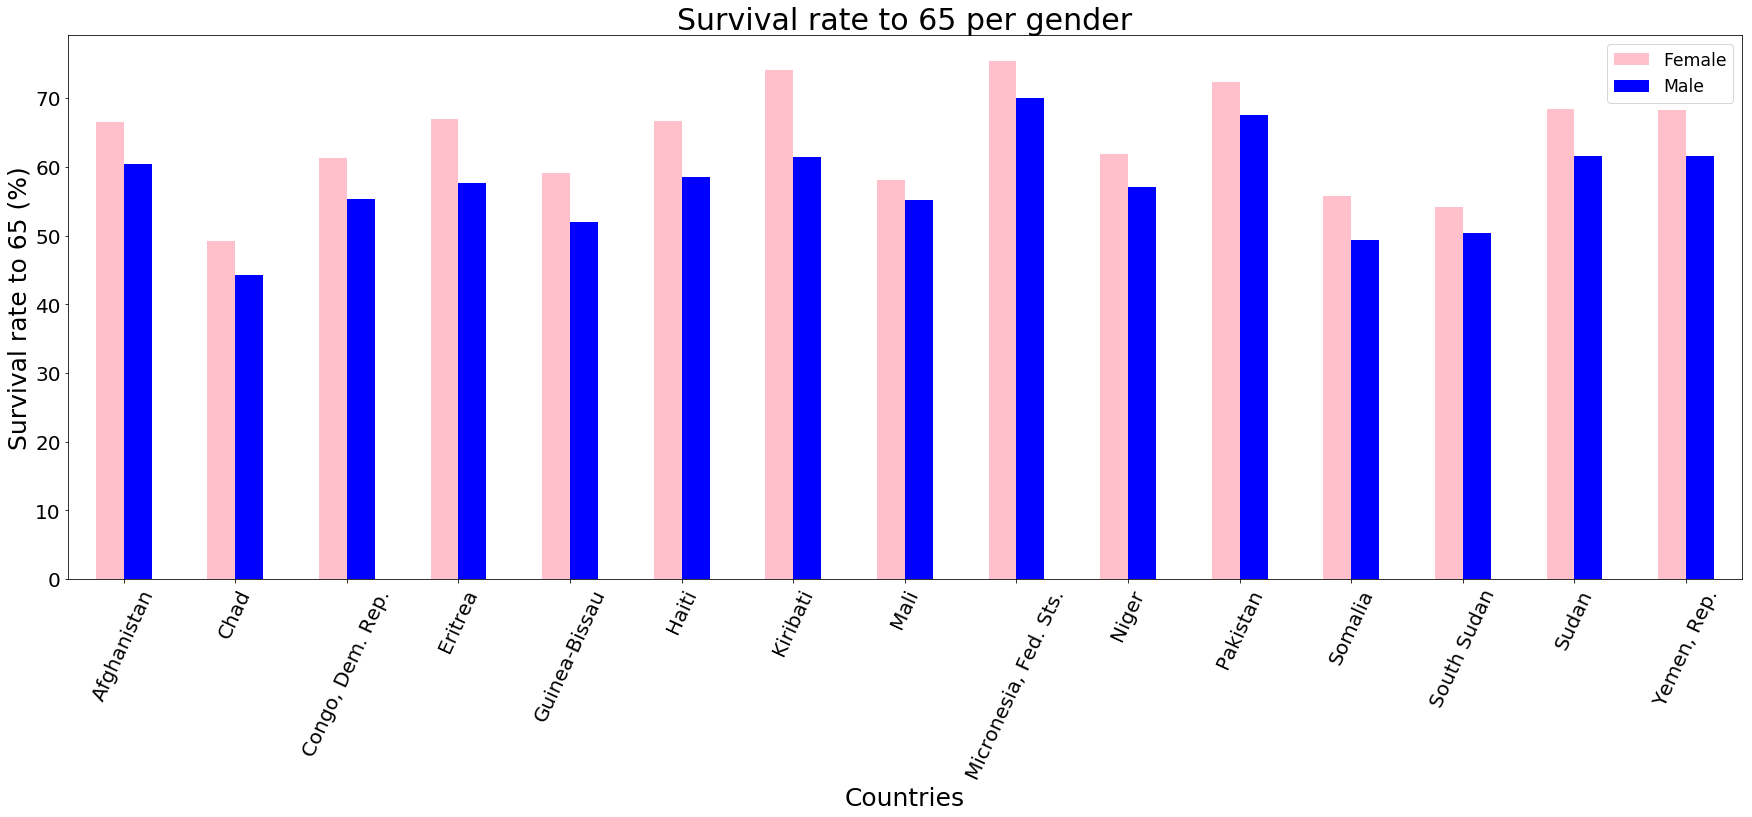

In [17]:

def TwoBarPlot(merged, title = '', xlabel = '', ylabel = ''):
    merged.pivot(index = "country", columns = "Gender", values = "value_y").plot.bar(color = ['pink', 'blue'], 
                                                                                 figsize = (30,10), fontsize = 20)

    plt.xticks(rotation = 65, fontsize = 20)
    plt.yticks(fontsize = 20)

    # labels
    plt.title(title, fontsize = 30)
    plt.xlabel(xlabel, fontsize = 25)
    plt.ylabel(ylabel, fontsize = 25)

    plt.legend(fontsize = 'xx-large')

TwoBarPlot(Survival65_worst15, "Survival rate to 65 per gender", "Countries", 'Survival rate to 65 (%)')

# Grafiek per land over de jaren heen --> man/vrouw lijn

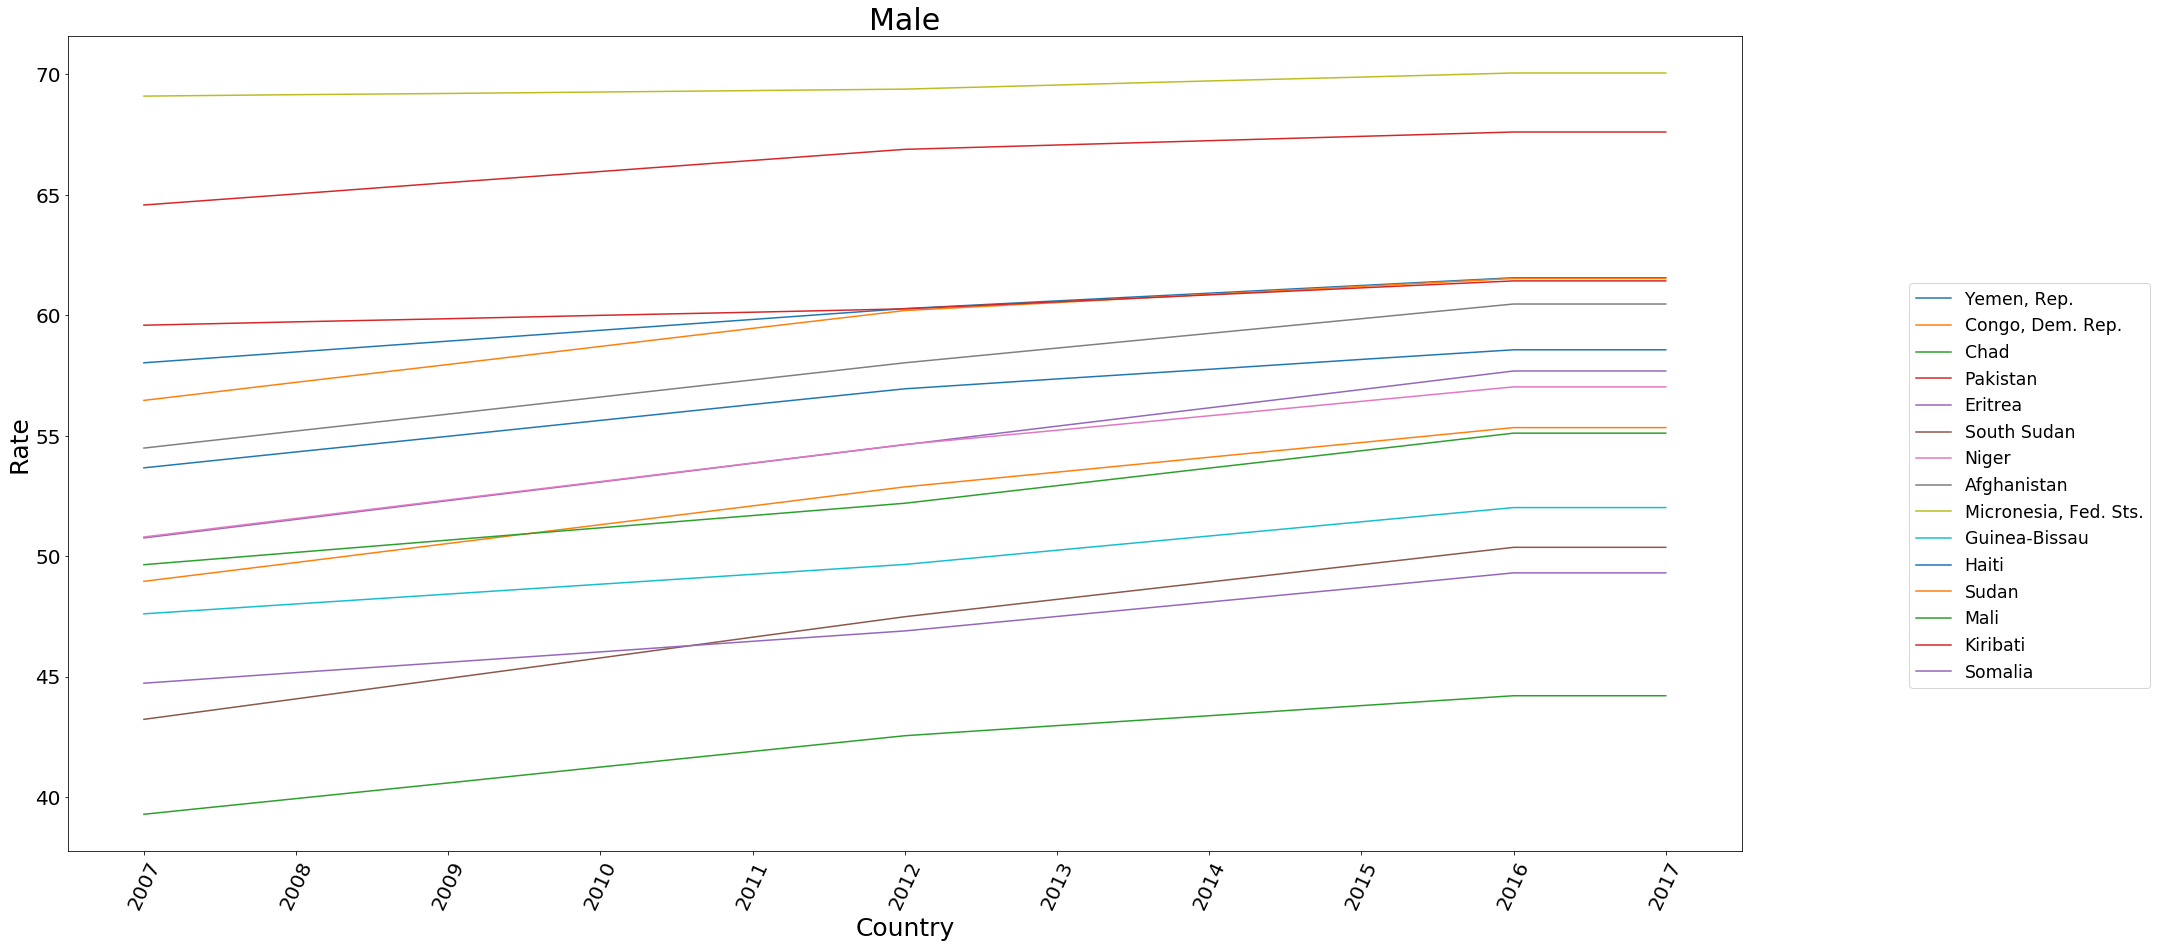

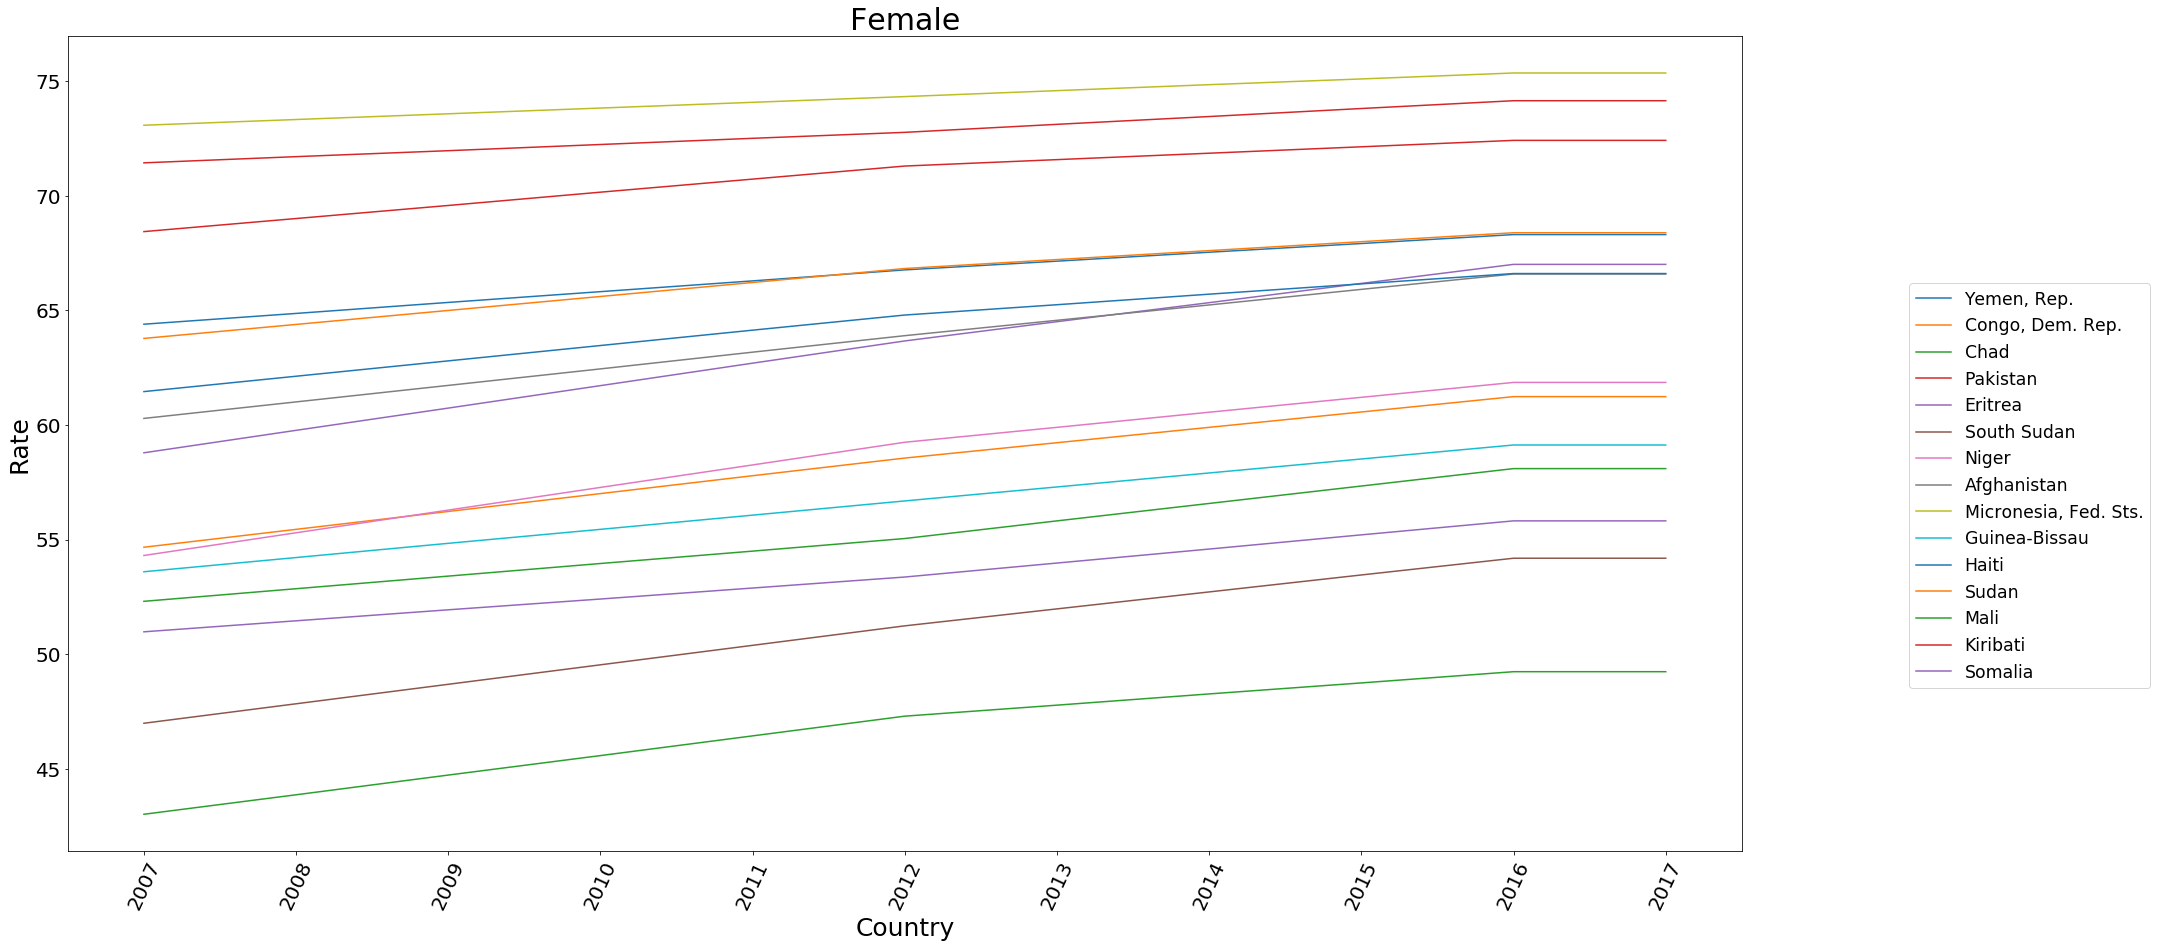

In [18]:
# twee aparte grafieken. 1 man 1 vrouw
S65M_years = getYears15(Survival65_Male)
S65F_years = getYears15(Survival65_Female)
S65M_years['date'] = S65M_years.date.astype(str)
S65F_years['date'] = S65F_years.date.astype(str)
graph(S65M_years, 'Male', 'Country', 'Rate')
graph(S65F_years, 'Female', 'Country', 'Rate')


In [19]:
# S65M_worst15 = get_worst15(Survival65_Male)
# S65F_worst15 = get_worst15(Survival65_Female)

In [183]:
S65M_years = getYears15(Survival65_Male)
S651F_years = getYears15(Survival65_Female)
S65_years = pd.concat([S65M_years, S651F_years])

,country,date,decimal,indicator,value,country_code,Gender
15148,"Yemen, Rep.",2007,0,": 'Survival to age 65, male (% of cohort)",58.03,YE,Male
5288,"Congo, Dem. Rep.",2007,0,": 'Survival to age 65, male (% of cohort)",48.96,CD,Male
4940,Chad,2007,0,": 'Survival to age 65, male (% of cohort)",39.29,TD,Male
11378,Pakistan,2007,0,": 'Survival to age 65, male (% of cohort)",64.58,PK,Male
6274,Eritrea,2007,0,": 'Survival to age 65, male (% of cohort)",50.76,ER,Male


# Vanaf hier!

In [233]:
S65M_years = getYears15(Survival65_Male)
S651F_years = getYears15(Survival65_Female)

# S65M_years['date'] = S65M_years['date'].astype(str)
# S65F_years['date'] = S65F_years['date'].astype(str)
# test = pd.merge(S65M_years, S65F_years, how = 'left', right_on=['country', 'date'], left_on = ['country', 'date'])
# test.head()

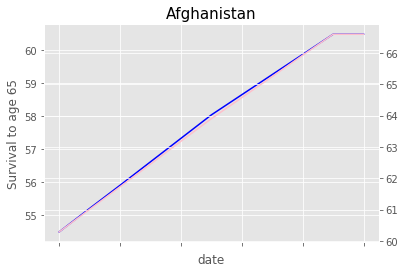

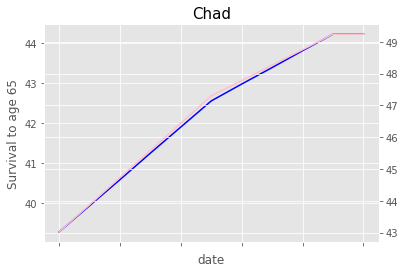

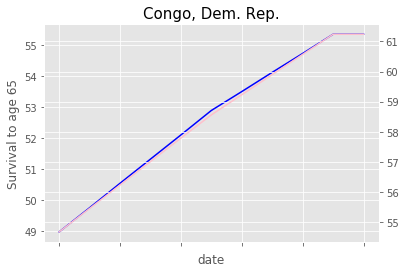

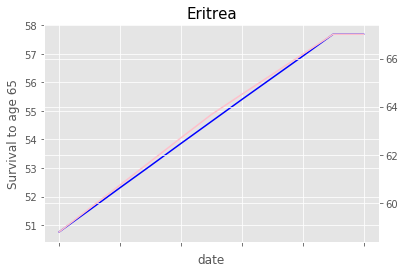

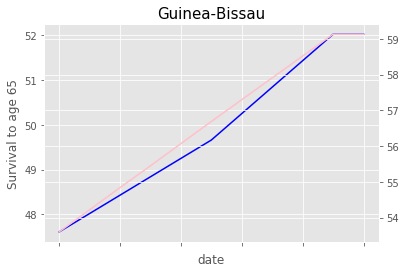

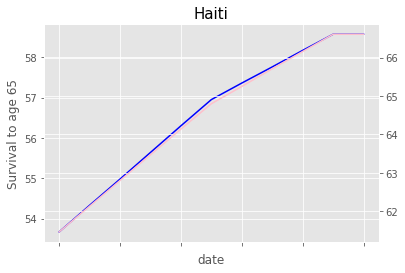

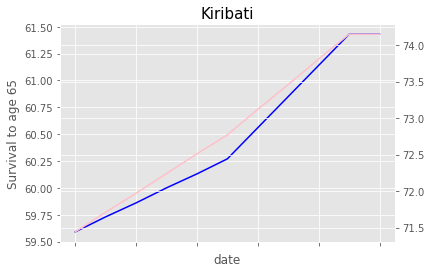

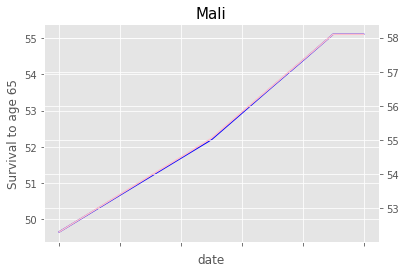

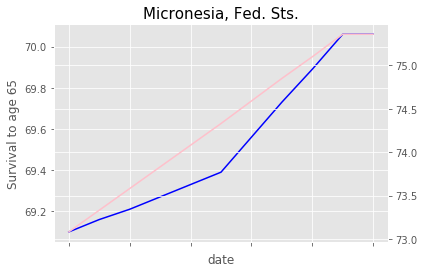

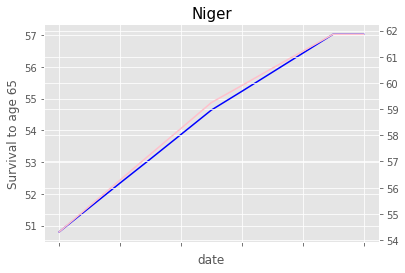

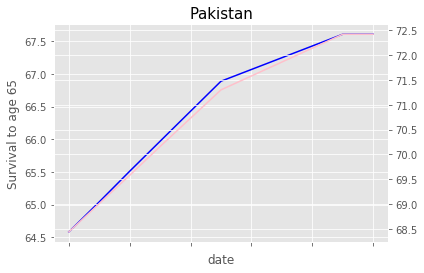

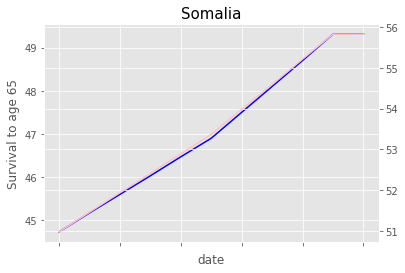

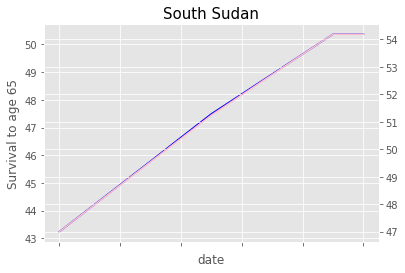

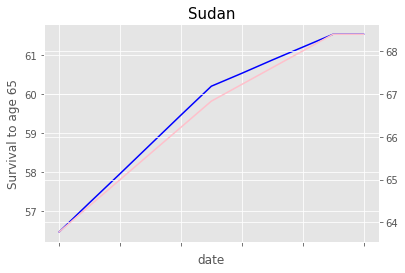

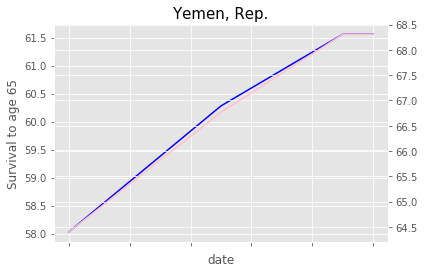

In [241]:
def twoLineMultiPlot(df1, df2):
    df1['date'] = df1['date'].astype(str)
    df2['date'] = df2['date'].astype(str)
    merged = pd.merge(df1, df2, how = 'left', right_on=['country', 'date'], left_on = ['country', 'date'])
    
    grouped = merged.groupby('country')
    for name,group in grouped:
        fig = plt.figure()
        ax1 = fig.add_subplot(111)
        group.plot.line(ax=ax1, color='blue',x="date",y="value_x", legend = False)
        ax1.set_ylabel('Survival to age 65')
        ax2 = ax1.twinx()
        group.plot.line(ax=ax2, color='pink',x="date",y="value_y", legend = False)
        plt.title(str(name), fontsize=15)

        plt.show()
        
twoLineMultiPlot(S65M_years, S65F_years)        